## Generator network | Transposed CNN

without training process

In [35]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

from keras.datasets import mnist

from keras.layers import (
    Activation, BatchNormalization, Dense, Dropout, Flatten, Reshape)


from keras.layers import Dense, Flatten, Reshape
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential
#from keras.optimizers import Adam
from keras.optimizers import adam_v2
from keras.layers.convolutional import Conv2D, Conv2DTranspose
from tensorflow.keras.utils import plot_model

In [36]:
img_rows = 28
img_cols = 28
channels = 1

img_shape = (img_rows, img_cols, channels)   

z_dim = 100


In [37]:
def build_generator(z_dim):

    model = Sequential()

    model.add(Dense(256 * 7 * 7, input_dim=z_dim))                           
    model.add(Reshape((7, 7, 256)))

    model.add(Conv2DTranspose(128, kernel_size=3, strides=2, padding='same'))

    model.add(BatchNormalization())                                          

    model.add(LeakyReLU(alpha=0.01))                                         

    model.add(Conv2DTranspose(64, kernel_size=3, strides=1, padding='same')) 

    model.add(BatchNormalization())                                          

    model.add(LeakyReLU(alpha=0.01))                                         

    model.add(Conv2DTranspose(1, kernel_size=3, strides=2, padding='same'))  

    model.add(Activation('tanh'))                                            

    return model


Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 12544)             1266944   
                                                                 
 reshape_9 (Reshape)         (None, 7, 7, 256)         0         
                                                                 
 conv2d_transpose_27 (Conv2D  (None, 14, 14, 128)      295040    
 Transpose)                                                      
                                                                 
 batch_normalization_18 (Bat  (None, 14, 14, 128)      512       
 chNormalization)                                                
                                                                 
 leaky_re_lu_18 (LeakyReLU)  (None, 14, 14, 128)       0         
                                                                 
 conv2d_transpose_28 (Conv2D  (None, 14, 14, 64)      

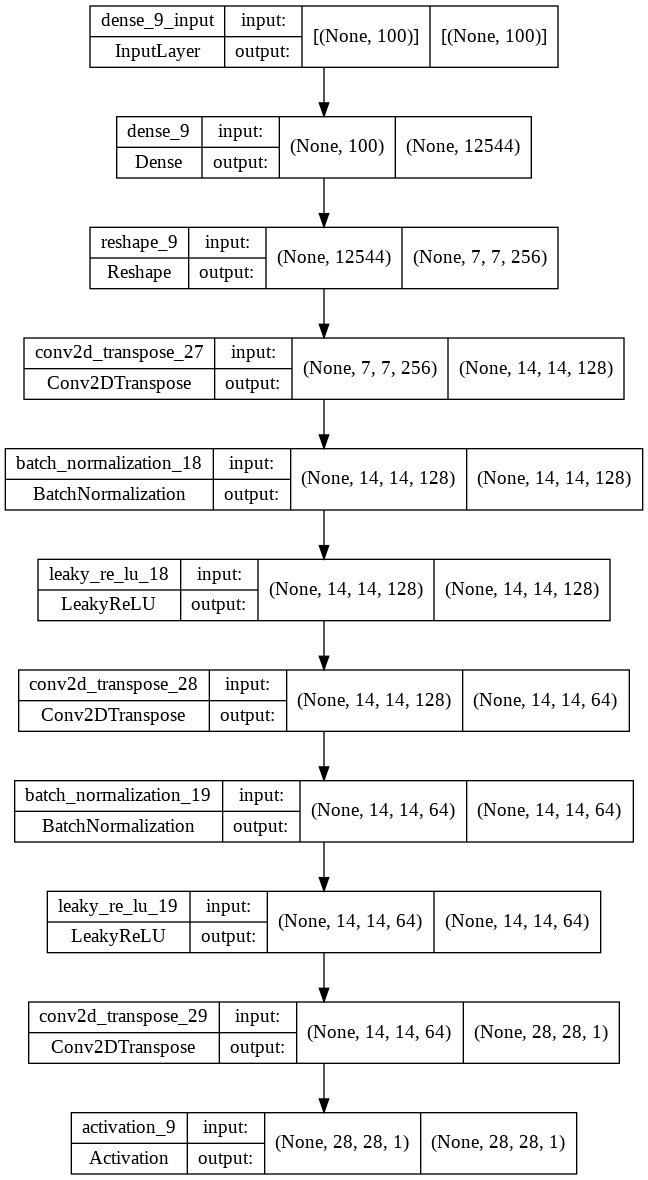

In [38]:
generator = build_generator(z_dim)
generator.compile(loss='binary_crossentropy',
                      optimizer=adam_v2.Adam(),
                      metrics=['accuracy'])
generator.summary()
plot_model(generator, to_file='model.png', show_shapes=True)


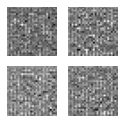

In [41]:
image_grid_rows = 2
image_grid_columns = 2
z = np.random.normal(0, 1, (image_grid_rows*image_grid_columns ,z_dim))

gen_imgs = generator.predict(z)
gen_imgs = 0.5 * gen_imgs + 0.5 # [-1 1] --> [0 1]

fig, axs = plt.subplots(image_grid_rows,                                 
                            image_grid_columns,
                            figsize=(2, 2),
                            sharey=True,
                            sharex=True)


cnt = 0
for i in range(image_grid_rows):
    for j in range(image_grid_columns):
        axs[i, j].imshow(gen_imgs[cnt, :, :, 0], cmap='gray')           
        axs[i, j].axis('off')
        cnt += 1

